In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("gt (1).csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,file,source,text,language,era
0,0,0,002_080_001,2014,"36 6. The evidence of the engagement, consign...",en,19c
1,1,1,002_112_001,2014,[13][Me .... issuing Clerk] For the purpose o...,en,19c
2,2,2,002_121_001,2014,31 [16] [Local Annuity Note Office in ....] T...,en,19c
3,3,3,002_541_001,2014,Ch. III. Grounds of Expectation with regard t...,en,19c
4,4,4,002_579_001,2014,(a)The distinction is material: for as fixed ...,en,19c
...,...,...,...,...,...,...,...
11241,11241,11241,116_605_001,2015,NaN,NaN,19c
11242,11242,11242,116_608_001,2015,NaN,NaN,19c
11243,11243,11243,116_621_001,2015,NaN,NaN,19c
11244,11244,11244,116_623_002,2015,NaN,NaN,19c


In [5]:
base=[]
back=[]
corr=[]
for f in df["file"]:
    i=0
    fi=["historical_trancriptions/background/","historical_trancriptions/correction/", "historical_trancriptions/base/"]
    for path in fi:

        try:
            with open(path+f+".txt", "r", encoding="latin") as file1:
                text=file1.read()
        except:
            text="Not done"
        if i==0:
            back.append(text)
        if i==1:
            corr.append(text)

        if i==2:
            base.append(text)
        i+=1
    
            

In [6]:
df["base"]=base

In [7]:
df["back"]=back

In [8]:
df["corr"]=corr

In [9]:
df=df[df["back"]!="Not done"]
df=df[df["corr"]!="Not done"]
df=df[df["base"]!="Not done"]

In [10]:
def clean(s):
    return " ".join(s.split()).lower()

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Count')

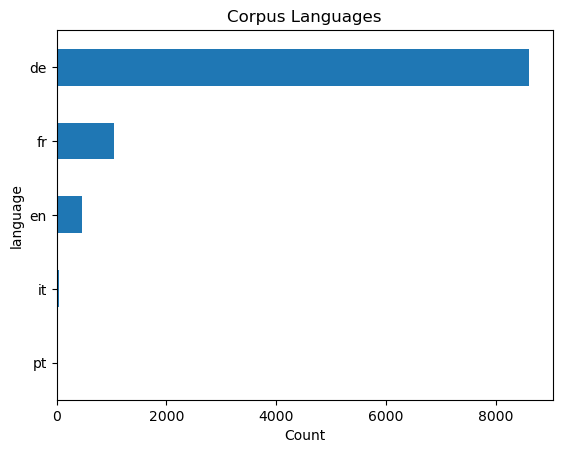

In [12]:
df["language"].value_counts().plot.barh()
plt.gca().invert_yaxis()
plt.title("Corpus Languages")
plt.xlabel("Count")

In [13]:
from jiwer import cer, wer

In [14]:
char=[]
word=[]
for i in range(0, len(df)):
    orig=clean(df.iloc[i]["text"])
    com=clean(df.iloc[i]["base"])
    error = cer(orig, com)
    char.append(error)
    error = wer(orig, com)
    word.append(error)

In [15]:
df["basecer"]=char
df["basewer"]=word


In [16]:
char=[]
word=[]
for i in range(0, len(df)):
    orig=clean(df.iloc[i]["text"])
    com=clean(df.iloc[i]["corr"])
    error = cer(orig, com)
    char.append(error)
    error = wer(orig, com)
    word.append(error)

In [17]:
df["ccer"]=char
df["cwer"]=word

In [18]:
char=[]
word=[]
for i in range(0, len(df)):
    orig=clean(df.iloc[i]["text"])
    com=clean(df.iloc[i]["back"])
    error = cer(orig, com)

    char.append(error)

    error = wer(orig, com)
    word.append(error)

In [19]:
import seaborn as sns

In [20]:
df["bcer"]=char
df["bwer"]=word

In [45]:
df=df.sort_values("bcer", ascending=True)

In [56]:
df[df["language"]=="fr"].iloc[4]["text"]

" \n        Paris\n        20 mars 1857\n      \nMonsieur A. Escher, Président du Comité de Direction\nde la Compagnie du chemin de fer du Nord-Est de la Suisse.\nMonsieur,\nConformément à ce dont nous sommes convenus\nverbalement, je viens vous renouveler l'assurance que,\ndans l'Assemblée générale qui devra décider du siége de\nla Société Générale des Chemins de Fer Suisses, j'userai\nde toute l'influence que je possède, soit par les actions\nque je représente, soit par mes relations avec d'autres\nAdministrateurs, pour faire désigner Zurich comme\nsiège de la Société.\nRecevez, Monsieur, l'assurance\nde ma considération la plus distinguée.\nEmile Pereire"

In [47]:
df[df["language"]=="fr"].iloc[0]["file"]

'013142'

In [57]:
df[df["language"]=="fr"].iloc[4]["base"]

" Paris 20 mars 1887\n\nMonsieur N. Bocher, Président du Comité de direction\nde la Compagnie du chemin de fer du Nord de l'Espagne\n\nMonsieur,\n\nConformément à ce dont nous sommes convenus verbalement, je viens vous renouveler l'assurance que dans le prochain conseil général qui devra décider du siège de la Société Générale des Chemins de fer Espagnols, j'userai de toute l'influence que je possède, soit par les actions que je représente, soit par mes relations avec d'autres Administrateurs, pour faire désigner Zurich comme siège de la Société.\n\nVeuillez recevoir, Monsieur, l'assurance de ma considération la plus distinguée.\n\nEmile Pereire"

In [177]:
df.iloc[0]["text"]

' It may here indeed be observed that the Money  which he is amerced goes to the State and therefore is not  lost: The Absurdity of such a proposition provision  will therefore appear still stronger & more unquestionable  if instead of the Fine we take for the Punishment any  Number of Stripes, no Matter what, which any one  may suppose equivalent to it. _ I made choice in  the Example of a suffering having the same Subject  as the Crime only for the Simplicity of the Picture '

Text(0, 0.5, 'Frequency (Density)')

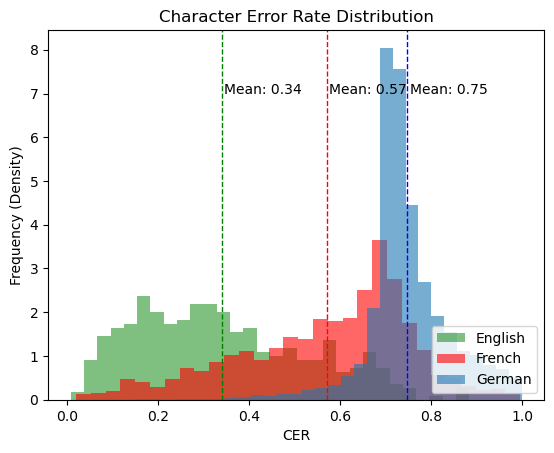

In [32]:
temp=df[df["language"]=="en"]["bcer"]
temp1=df[df["language"]=="fr"]["bcer"]
temp2=df[df["language"]=="de"]["bcer"]
temp=temp[temp<1]
temp1=temp1[temp1<1]
temp2=temp2[temp2<1]

min_ylim, max_ylim = plt.ylim()

plt.hist(temp, bins=30, alpha=0.5,color='g', density=True, label="English")
plt.axvline(temp.mean(), color='g', linestyle='dashed', linewidth=1)
plt.text(temp.mean()*1.01, max_ylim*7, 'Mean: {:.2f}'.format(temp.mean()))

plt.hist(temp1, bins=30, alpha=0.6, color="r", density=True, label="French")
plt.axvline(temp2.mean(), color='b', linestyle='dashed', linewidth=1)
plt.text(temp2.mean()*1.01, max_ylim*7, 'Mean: {:.2f}'.format(temp2.mean()))
plt.hist(temp2, bins=30, alpha=0.6, density=True, label="German")
plt.axvline(temp1.mean(), color='r', linestyle='dashed', linewidth=1)
plt.text(temp1.mean()*1.01, max_ylim*7, 'Mean: {:.2f}'.format(temp1.mean()))

plt.title("Character Error Rate Distribution")
plt.legend(loc="lower right")
plt.xlabel("CER")
plt.ylabel("Frequency (Density)")


In [128]:
temp2

433     0.702650
436     0.759534
437     0.666667
441     0.767273
443     0.737006
          ...   
7795    0.753758
7796    0.665541
7797    0.753018
7798    0.717219
7801    0.386525
Name: basecer, Length: 5460, dtype: float64

In [21]:
df[df["language"]=="en"]["bcer"].mean()

0.49905681561512927

In [30]:
df[df["language"]=="en"]["basecer"].mean()

0.44851425889087093

In [23]:
df[df["language"]=="fr"]["ccer"].mean()

0.6570249434962119

In [24]:
df[df["language"]=="fr"]["bcer"].mean()

0.6284090719559926

In [25]:
df[df["language"]=="fr"]["basecer"].mean()

0.6345384628721363

In [26]:
df[df["language"]=="de"]["basecer"].mean()

0.8426788546343669

In [27]:
df[df["language"]=="it"]["basecer"].mean()

0.6503424970904143

In [67]:
orig

'hochverehrter herr und freund ich kann es nicht über mich bringen wenigstens einige worte an sie zu schreiben. über die unglücklichen folgen des gestrigen tages mache ich mir kein hehl und ich will den schmerz auch nicht verbergen, den ich empfinde. aber nie mehr als heute habe ich'

In [68]:
com

'wohlverehrliche herrn und freund ich kann es nicht abermals wagen weihnachtsgrüße worte an sie zu schreiben. aber die freundlichen zeilen der geehrten sagen machte uns sehr froh und ich sollte den schmerz nicht licht bahnen, den die entfernung aber die meere zwischen uns gelegt hat.'

In [66]:
char

[0.255653883972468,
 0.7751152073732719,
 1.8181818181818181,
 0.3547008547008547,
 0.1837837837837838,
 1.0,
 0.20020746887966806,
 0.18407960199004975,
 0.24320987654320989,
 1.0,
 0.1572192513368984,
 0.23952095808383234,
 0.21278625954198474,
 0.2838709677419355,
 0.565068493150685,
 0.24072476272648835,
 0.5415800415800416,
 0.3827054794520548,
 0.5149196633511859,
 0.6112115732368897,
 0.6170752324598479,
 0.6364846870838882,
 0.5,
 1.0,
 1.0,
 0.3009367681498829,
 0.08841463414634146,
 0.4619377162629758,
 0.1890909090909091,
 0.0630048465266559,
 0.18510158013544017,
 0.043478260869565216,
 0.4888521882741536,
 0.637043966323667,
 0.5629090909090909,
 0.28205128205128205,
 0.19748305905130686,
 0.5735159817351598,
 0.10185185185185185,
 0.5434362934362934,
 0.4036697247706422,
 0.26647286821705424,
 0.11538461538461539,
 0.30035971223021585,
 0.37642276422764226,
 0.4520276953511375,
 0.3944954128440367,
 0.22983870967741934,
 0.13878326996197718,
 0.592741935483871,
 0.1798839

In [55]:
df["text"].apply(clean)

0       36 6. the evidence of the engagement, consigne...
1       [13][me .... issuing clerk] for the purpose of...
2       31 [16] [local annuity note office in ....] th...
3       ch. iii. grounds of expectation with regard to...
4       (a)the distinction is material: for as fixed i...
                              ...                        
7797    bahn gehabt, mag zu solchen ahnungen und gerüc...
7798    rufen werden wird, davon verlautet noch nichts...
7799    hochgeachteter herr! ihr freundliches schreibe...
7800    gottardo era riservato il trionfo di tutti gli...
7801    hochverehrter herr und freund ich kann es nich...
Name: text, Length: 7778, dtype: object

In [47]:
df["base"].apply(clean)

0       16 aug 1800 6. the evidence of the engagement,...
1       [page 28] 2a jan 1823 to the right worshipfull...
2       [16] local annuity note office in . . . . . . ...
3       ch. iii. grounds of expectation with regard to...
4       note the distinction (a) for as fixed income c...
                              ...                        
7797    hochgeehrter herr! ihren gütigen wünschen gemä...
7798    2. ergebenst anzeigen. dieselbe betrift die ab...
7799                                                     
7800    goffredo ha visitato il nostro stabilimento al...
7801    wohlverehrliche herrn und freund ich kann es n...
Name: base, Length: 7778, dtype: object

In [41]:
df["corr"]

0                                                        
1        [page 28]\n\nV5] Mr. Spring Clerk\nIn the pur...
2        [16] Local Annuity Note Office in . . . . The...
3        Ch. III. Grounds of Expectation with regard t...
4        Note\nThe distinction is material, for as fix...
                              ...                        
7797     Hochgeehrtester Herr,\n\nEw. Gnaden erlauben ...
7798     Ew. Wohlgebohrnen\nhabe ich die Ehre, inliege...
7799                                                     
7800     Goffredo ha visitato il nostro stabilimento a...
7801     Wohlverehrtester Herr und Freund\n\nIch kann ...
Name: corr, Length: 7793, dtype: object